#Binary Search

In [ ]:
import sys

def binary_search(a, x):
    left, right = 0, len(a)-1
    # write your code here
    while left <= right:
        mid = left + (right - left)//2
        if x == a[mid]:
            return mid
        elif x < a[mid]:
            right = mid - 1
        else:
            left = mid + 1
    return -1

def linear_search(a, x):
    for i in range(len(a)):
        if a[i] == x:
            return i
    return -1

if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    m = data[n + 1]
    a = data[1 : n + 1]
    for x in data[n + 2:]:
        # replace with the call to binary_search when implemented
        print(binary_search(a, x), end = ' ')

#Majority Element

In [ ]:
# Uses python3
import sys

def get_majority_element(a, left, right):
    if left == right:
        return -1
    if left + 1 == right:
        return a[left]
    #write your code here
    left_m = get_majority_element(a, left, (left + right - 1)//2 + 1)
    right_m = get_majority_element(a, (left + right - 1)//2 + 1, right)
    
    left_count = 0

    for i in range(left, right):
        if a[i] == left_m:
            left_count += 1
    if left_count > (right-left)//2:
        return left_m
 
    right_count = 0
    
    for i in range(left, right):
        if a[i] == right_m:
            right_count += 1
    if right_count > (right-left)//2:
        return right_m

    return -1

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    if get_majority_element(a, 0, n) != -1:
        print(1)
    else:
        print(0)


#Sorting

In [ ]:
# Uses python3
import sys
import random

def partition3(a, l, r):
    #write your code here
    if r - l == 1:
        if a[l] > a[r]:
            a[l], a[r] = a[r], a[l]
        return [r, r]
    
    pivot = a[l]
    index_min = l
    index_max = r

    for i in range(l, r+1):
        if i > index_max or index_min >= index_max:
            break
        if pivot == a[i]:
            continue

        ext = False
        while pivot < a[i]:
            a[i], a[index_max] = a[index_max], a[i]
            index_max -= 1

            if i == index_max:
                ext = True
                break

        while pivot > a[i]:
            a[i], a[index_min] = a[index_min], a[i]
            index_min += 1
        
        if ext:
            break

    r_2 = r

    if index_max < r:
        r_2 = index_max

    if index_max != index_min:
        r_2 -= 1
    
    l_2 = l
    if index_min > l:
        l_2 = index_min


    return [l_2, r_2]

def partition2(a, l, r):
    x = a[l]
    j = l
    for i in range(l + 1, r + 1):
        if a[i] <= x:
            j += 1
            a[i], a[j] = a[j], a[i]
    a[l], a[j] = a[j], a[l]
    return j


def randomized_quick_sort(a, l, r):
    if l >= r:
        return
    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    arr_2 = partition3(a, l, r)
    randomized_quick_sort(a, l, arr_2[0] - 1)
    randomized_quick_sort(a, arr_2[1] + 1, r)


if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    randomized_quick_sort(a, 0, n - 1)
    for x in a:
        print(x, end=' ')


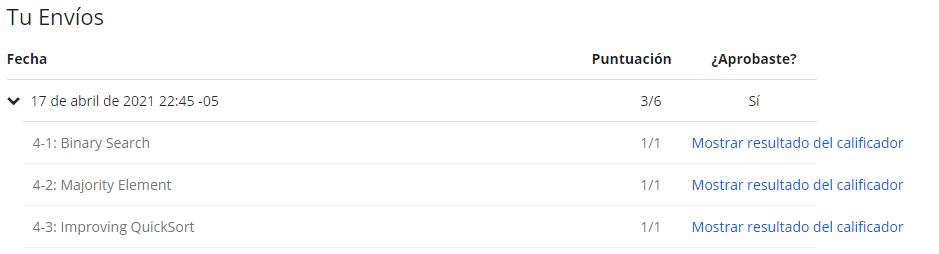